In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def cumulative_percentage(df, project, percentage=100):
    # 计算每个不同email的commit数量
    commit_counts = df['Author Email'].value_counts().reset_index()
    commit_counts.columns = ['Author Email', 'Commit Count']
    
    # 对commit数量进行排序
    commit_counts.sort_values('Commit Count', ascending=False, inplace=True)
    
    # 计算总提交量
    total_commits = commit_counts['Commit Count'].sum()
    
    # 计算作者总数
    total_authors = commit_counts['Author Email'].nunique()
    print(f"总作者数量: {total_authors}")
    
    # 计算每个作者的提交量占总提交量的百分比
    commit_counts['Cumulative Percentage'] = commit_counts['Commit Count'].cumsum() / total_commits * 100
    
    # 计算符合条件的作者数量
    author_percentage = percentage  # 可调整为需要的百分比
    threshold_commits = total_commits * (author_percentage / 100)
    threshold_index = commit_counts[commit_counts['Commit Count'].cumsum() <= threshold_commits].shape[0]
    top_authors = commit_counts[commit_counts['Commit Count'].cumsum() <= threshold_commits]

    # 为这些作者收集相关项目名称
    projects_info = []
    for index, row in top_authors.iterrows():
        author_email = row['Author Email']
        author_projects = df[df['Author Email'] == author_email]['Project'].apply(lambda x: x.split('/')[0]).unique()
        author_name = df[df['Author Email'] == author_email]['Author Name'].iloc[0]
        for author_project in author_projects:
            projects_info.append({'Author Email': author_email, 'Author Name': author_name, 'Project Name': author_project})

    projects_df = pd.DataFrame(projects_info)
    
    print(f"前{author_percentage}%的commit由前{threshold_index}名作者贡献。")
    print(f"这些作者占总作者数的{(threshold_index / total_authors * 100):.2f}%。")

    # 绘制曲线图
    plt.figure(figsize=(10, 6))
    plt.plot(commit_counts['Cumulative Percentage'], marker='o', linestyle='-', color='b')
    
    # 添加辅助线
    plt.axvline(x=threshold_index, color='r', linestyle='--', label=f'Top {threshold_index} Authors')
    plt.axhline(y=author_percentage, color='g', linestyle='--', label=f'Top {author_percentage}% of Commits')

    # 在辅助线位置添加横纵坐标数据
    plt.text(threshold_index, author_percentage, f'({threshold_index}, {author_percentage}%)', fontsize=12, ha='left')
 
    # 添加图例
    plt.legend()
    
    plt.title(f'Cumulative Percentage of Commits by Authors in {project}')
    plt.xlabel('Number of Authors')
    plt.ylabel('Cumulative Percentage of Commits')
    plt.grid(True)
    plt.show()
    
    return projects_df


Project: spring-projects-projects
总作者数量: 2170
前50%的commit由前16名作者贡献。
这些作者占总作者数的0.74%。


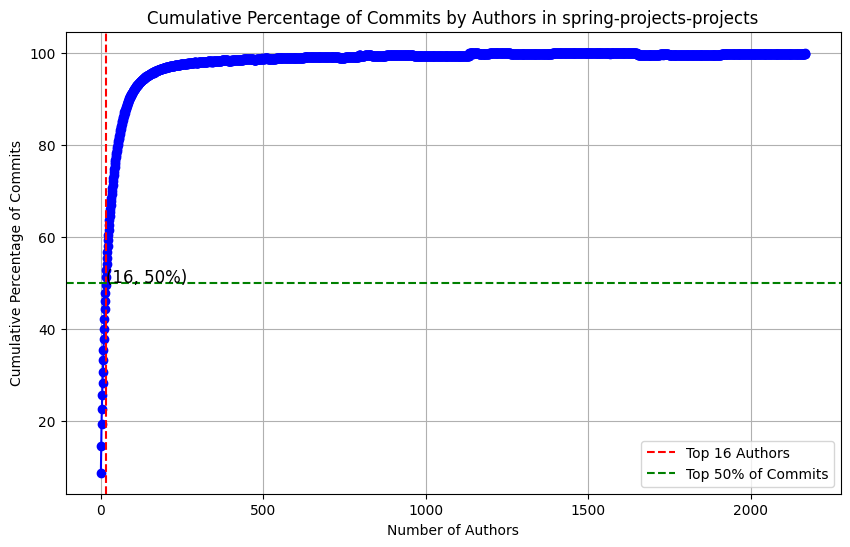

Project: SeleniumHQ-projects
总作者数量: 30
前100%的commit由前30名作者贡献。
这些作者占总作者数的100.00%。


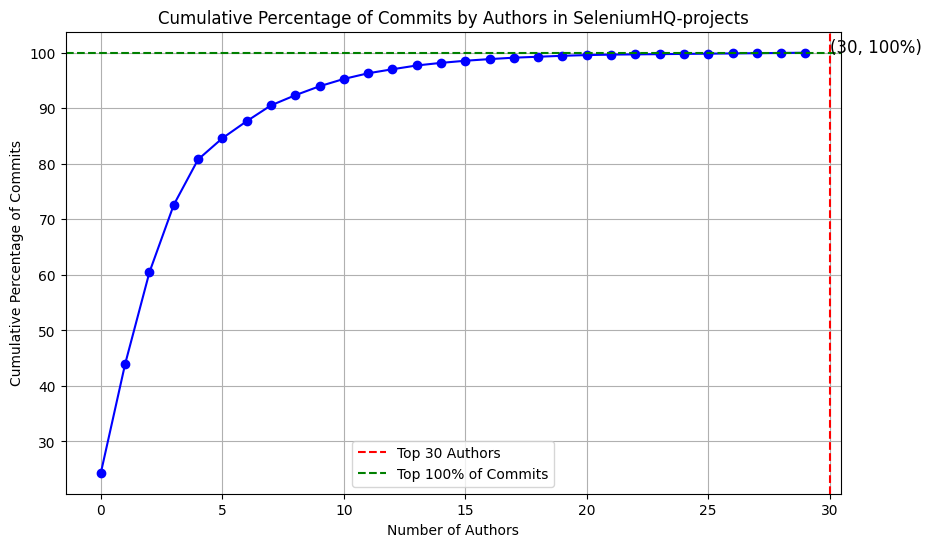

Project: google-projects
总作者数量: 632
前96%的commit由前129名作者贡献。
这些作者占总作者数的20.41%。


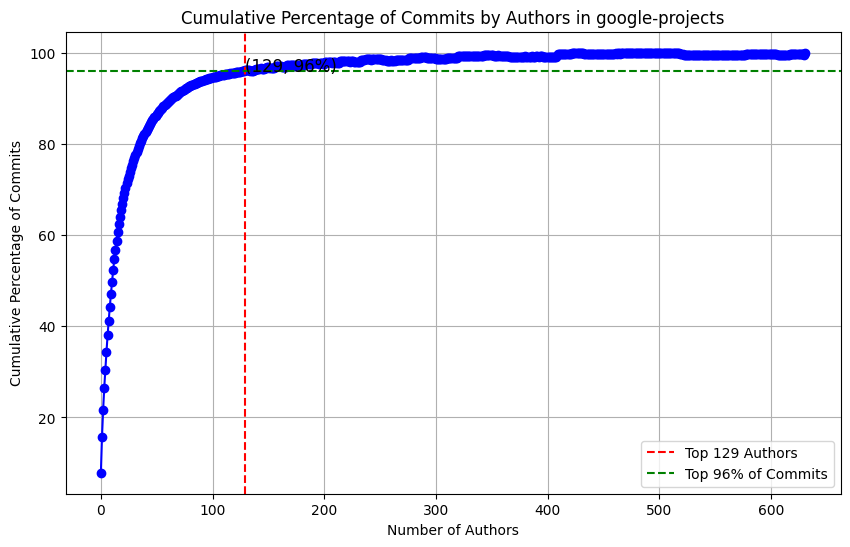

/tmp/ipykernel_7326/3344728307.py:11: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(project + c4t_path)


Project: apache-projects
总作者数量: 14418
前55%的commit由前214名作者贡献。
这些作者占总作者数的1.48%。


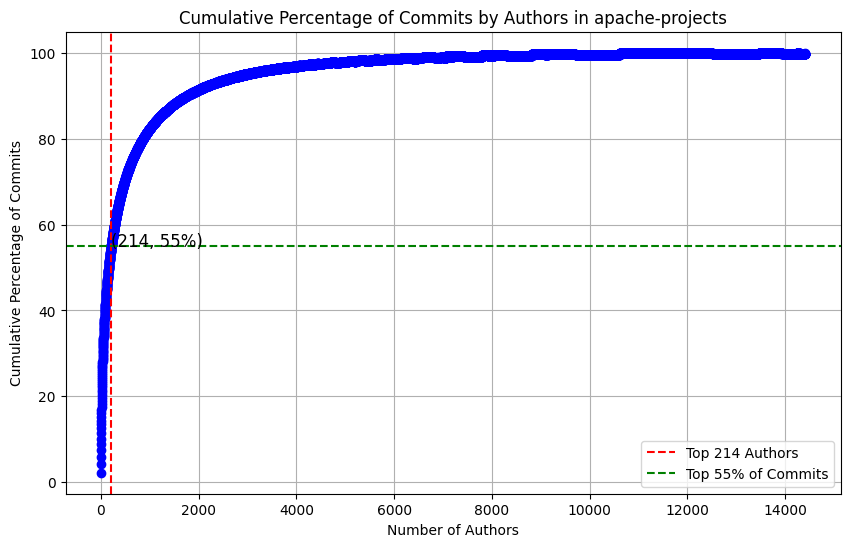

Project: microsoft-projects
总作者数量: 309
前96%的commit由前109名作者贡献。
这些作者占总作者数的35.28%。


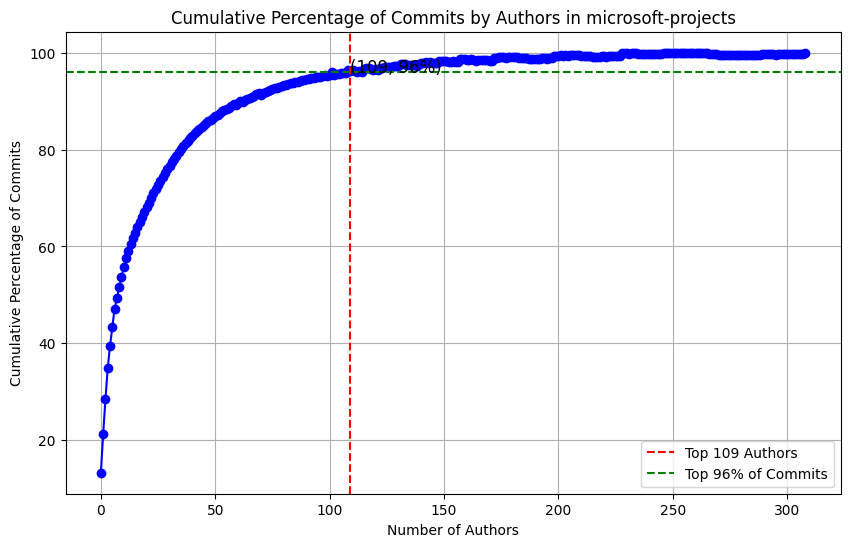

Project: Netflix-projects
总作者数量: 352
前96%的commit由前123名作者贡献。
这些作者占总作者数的34.94%。


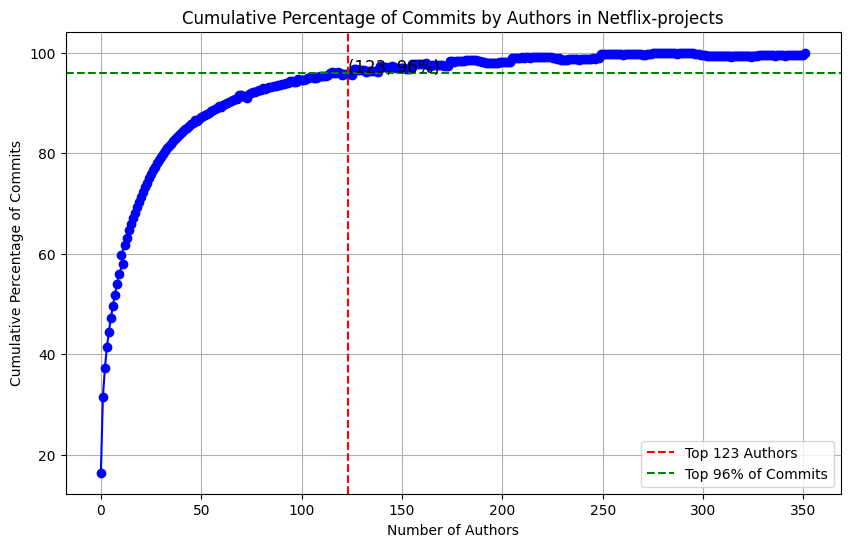

In [4]:
project_list = ["spring-projects-projects", "SeleniumHQ-projects","google-projects", "apache-projects", "microsoft-projects", "Netflix-projects"]
Project_percentage_list = [50,100, 96, 55, 96, 96]
c4t_path = "/git_log/c4t/all_test_commit_log.csv"

for i in range(len(project_list)):
    project = project_list[i]
    percentage = Project_percentage_list[i]
    # Mail list csv file path
    mail_list_path = f"/mail_list_{project}_{percentage}.csv"

    df = pd.read_csv(project + c4t_path)
    print(f"Project: {project}")
    mail_list = cumulative_percentage(df,project,percentage)
    mail_list.to_csv(project + mail_list_path, index=False)

Project: Netflix-projects
总作者数量: 352
前99%的commit由前233名作者贡献。
这些作者占总作者数的66.19%。


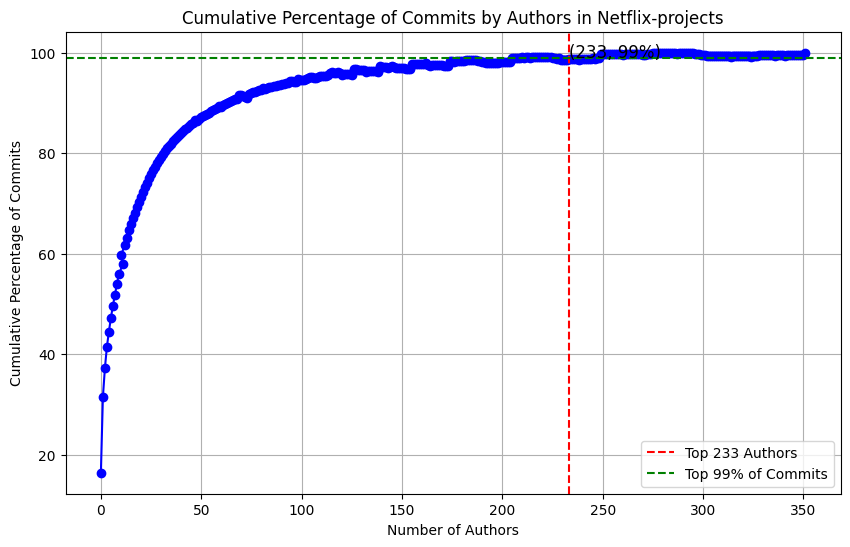

New authors added to the mail list: 141


In [6]:
# expand the size of the netfilx dev mail list to 98% and record the newly added authors to a new csv file
project = "Netflix-projects"
percentage = 99
mail_list_path = f"/mail_list_{project}_{percentage}.csv"
df = pd.read_csv(project + c4t_path)
print(f"Project: {project}")
mail_list = cumulative_percentage(df,project,percentage)
mail_list.to_csv(project + mail_list_path, index=False)

# read the original mail list
mail_list_path = "/mail_list_Netflix-projects_95.csv"
df = pd.read_csv(project + mail_list_path)
# find the newly added authors
new_authors = mail_list[~mail_list['Author Email'].isin(df['Author Email'])]
new_authors.to_csv(project + "/new_authors.csv", index=False)
print(f"New authors added to the mail list: {new_authors.shape[0]}")